In [1]:
import seaborn as sns
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
from os.path import exists, join
from io import StringIO  

In [2]:
ALGORITHMS = {
    'structural': 'Structural',
    'structural-variant': 'Splitted Structural',
    'sed': 'Bounded SED LB',
    'lblint': 'Label Intersection'
}

datasets = ('bolzano', 'dblp', 'ptb', 'python', 'sentiment', 'swissprot', 'treefam')

In [3]:
ALGORITHMS_ENUM_NAMES = {
    'structural': 'Structural',
    'structural-variant': 'StructuralVariant',
    'sed': 'Sed',
    'lblint': 'Lblint'
}

In [16]:
BASEPATH = 'resources/results/results'
def load_dataset(dataset: str, threshold: int):
    algorithm_times = dict()
    for alg in ALGORITHMS.keys():
        path = join(BASEPATH, ds, f'{dataset}-{ALGORITHMS_ENUM_NAMES[alg]}-times-us.txt')
        if not exists(path):
            print(alg, 'is not computed for', dataset, f'{path} skipping')
            continue
        df = pd.read_csv(path, names=["time"])
        with open(join(BASEPATH, dataset, f'{dataset}-{alg}-precision.txt')) as f:
            selectivity_line = f.readline()
            rest = f.read()

        sel = selectivity_line.split(':')[1]
        sel = float(sel.rstrip('%\n'))
        print(sel)
        seldf = pd.DataFrame.from_dict({'selectivity': [sel] })
        precision = pd.read_csv(StringIO(rest), delimiter=';')
        algorithm_times[alg] = [df, precision, seldf]
    return algorithm_times

In [17]:
tested_values= [('swissprot', 20), ('bolzano', 20), ('python', 30), ('sentiment', 10), ('ptb', 10), ('treefam', 15), ('DBLP', 6)]

In [18]:
dataframes = dict()
for ds, t in tested_values:
    dataframes[ds] = load_dataset(ds, t)

0.0002
0.0002
0.0002
0.0002
5.1908
5.06
4.2137
5.9676
0.5111
0.507
0.4375
0.5618
0.5141
0.4608
0.3421
0.5916
0.0166
0.0158
0.0123
0.0195
0.014
0.014
0.014
0.014
structural is not computed for DBLP resources/results/results/DBLP/DBLP-Structural-times-us.txt skipping
structural-variant is not computed for DBLP resources/results/results/DBLP/DBLP-StructuralVariant-times-us.txt skipping
sed is not computed for DBLP resources/results/results/DBLP/DBLP-Sed-times-us.txt skipping
lblint is not computed for DBLP resources/results/results/DBLP/DBLP-Lblint-times-us.txt skipping


In [25]:
dataframes['bolzano']['structural'][2]

,selectivity
0,5.1908


Printing  swissprot
Printing  bolzano
Printing  python
Printing  sentiment
Printing  ptb
Printing  treefam
Printing  DBLP


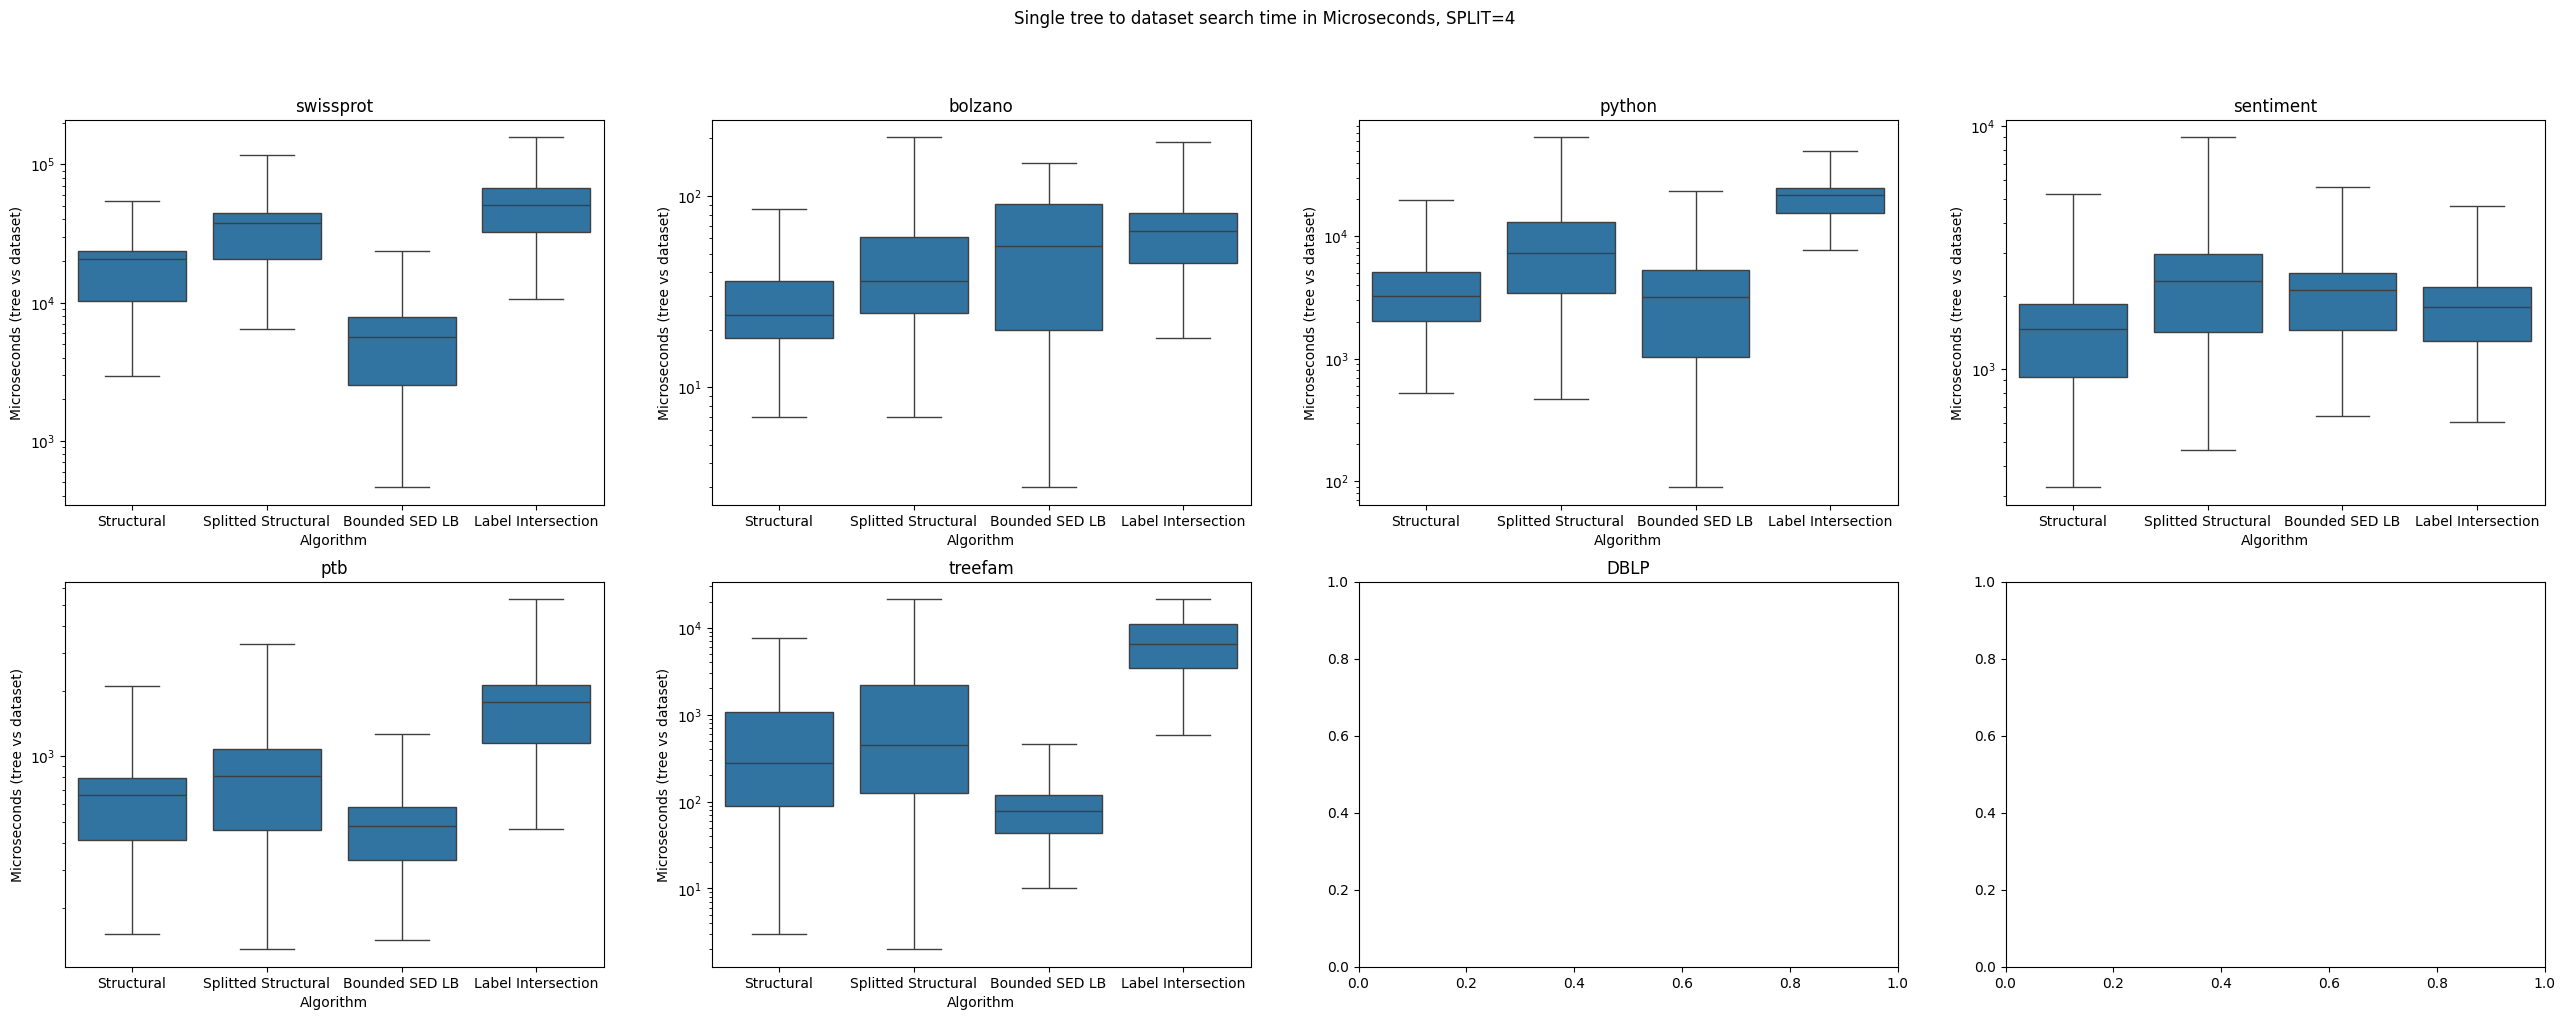

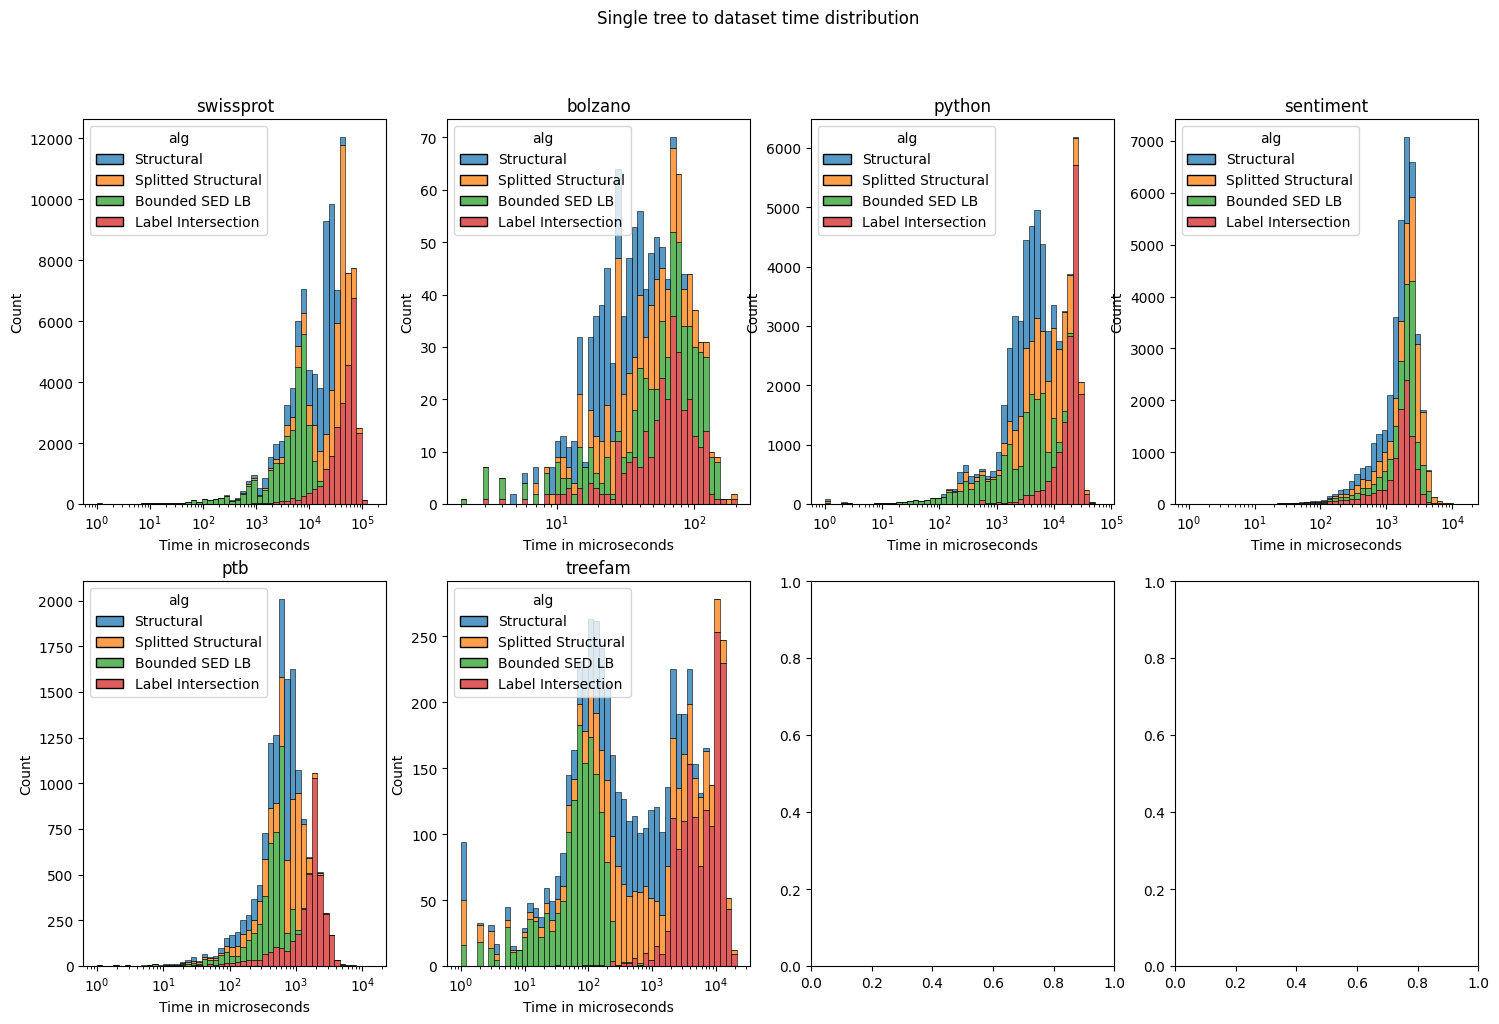

In [26]:
f, axes = plt.subplots(2, 4, figsize=(32, 11))
f.suptitle('Single tree to dataset search time in Microseconds, SPLIT=4')
f2, axes2 = plt.subplots(2, 4, figsize=(18, 11))
f2.suptitle('Single tree to dataset time distribution')
for i, (ds, x) in enumerate(tested_values):
    ax = int(i >= 4)
    ay = i % 4
    axes[ax][ay].set_title(ds)
    print('Printing ', ds)
    if ds.lower() == 'dblp':
        continue
    
    df = pd.DataFrame()
    for alg in dataframes[ds].keys():
        times = dataframes[ds][alg][0].copy()
        times['alg'] = ALGORITHMS[alg]
        df = pd.concat([df, times])
    bp = sns.boxplot(data=df, x='alg', y='time', log_scale=True, showfliers=False, ax=axes[ax][ay])
    bp.set(xlabel='Algorithm', ylabel='Microseconds (tree vs dataset)')
    hp = sns.histplot(data=df, x="time", hue='alg', log_scale=True, multiple="stack", ax=axes2[ax][ay], bins=50)
    hp.set(xlabel='Time in microseconds', title=ds)

In [56]:
dataframes['bolzano']['structural-variant'][2].fillna(0).get('selectivity')[0]

5.06

,Correct trees,Extra trees,Precision,Algorithm,Dataset
0,311,2,0.99361,Label Intersection,treefam


Algorithm,Bounded SED LB,Label Intersection,Splitted Structural,Structural
Dataset,,,,
bolzano,0.685273,0.513917,0.588025,0.575131
ptb,0.798300,0.504475,0.623727,0.592266
python,0.000985,0.000773,0.000853,0.000846
sentiment,0.562106,0.333437,0.421961,0.380023
swissprot,0.998211,0.000000,0.957118,0.957118
treefam,1.000000,0.993610,1.000000,1.000000


[Text(0.5, 1.0, 'Precision heatmap, SPLIT=4')]

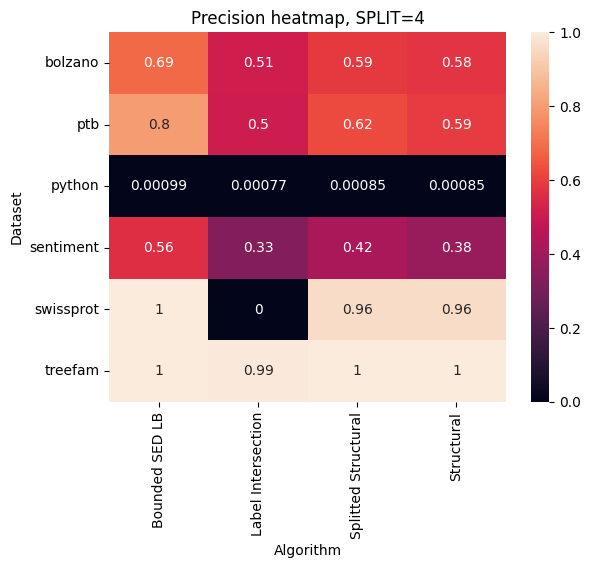

In [61]:
df = pd.DataFrame()

for i, (ds, x) in enumerate(tested_values):
    for alg in dataframes[ds].keys():
        summary = dataframes[ds][alg][1].copy()
        summary['Algorithm'] = ALGORITHMS[alg]
        summary['Dataset'] = ds
        # tpt - time per tree - total time / (number of trees)
        # summary['tpt'] = summary["Total Time"] / (summary["Correct trees"] + summary["Incorrect trees"])
        df = pd.concat([df, summary])
df
display(summary)
pivoted = df.pivot(index="Dataset", columns="Algorithm", values="Precision").fillna(0)
display(pivoted)
hp = sns.heatmap(pivoted, annot=True)
hp.set(title='Precision heatmap, SPLIT=4')

Algorithm,Bounded SED LB,Label Intersection,Splitted Structural,Structural
Dataset,,,,
bolzano,4.2137,5.9676,5.0600,5.1908
ptb,0.0123,0.0195,0.0158,0.0166
python,0.4375,0.5618,0.5070,0.5111
sentiment,0.3421,0.5916,0.4608,0.5141
swissprot,0.0002,0.0002,0.0002,0.0002
treefam,0.0140,0.0140,0.0140,0.0140


[Text(0.5, 1.0, 'Selectivity heatmap, SPLIT=4')]

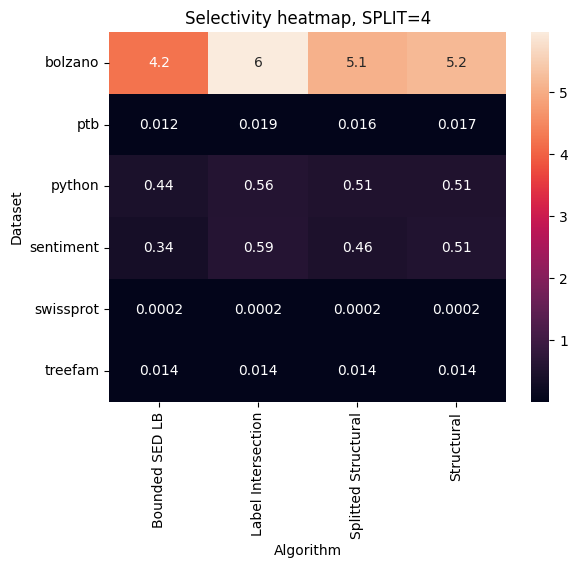

In [64]:
df = pd.DataFrame()

for i, (ds, x) in enumerate(tested_values):
    for alg in dataframes[ds].keys():
        summary = dataframes[ds][alg][1].copy()
        summary['Algorithm'] = ALGORITHMS[alg]
        summary['Dataset'] = ds
        summary['Selectivity'] = dataframes[ds][alg][2].fillna(0).get('selectivity')[0]
        summary = pd.concat([summary, ])
        # tpt - time per tree - total time / (number of trees)
        # summary['tpt'] = summary["Total Time"] / (summary["Correct trees"] + summary["Incorrect trees"])
        df = pd.concat([df, summary])
df
pivoted = df.pivot(index="Dataset", columns="Algorithm", values="Selectivity").fillna(0)
display(pivoted)
hp = sns.heatmap(pivoted, annot=True)
hp.set(title='Selectivity heatmap, SPLIT=4')